In [1]:
import pandas as pd
import numpy as np
import cx_Oracle
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from konlpy.tag import Kkma, Komoran, Okt, Hannanum

In [2]:
cx_Oracle.init_oracle_client(lib_dir=r"C:\instantclient-basic-windows.x64-21.9.0.0.0dbru\instantclient_21_9")

[-496.51425784]
[256184.34058456]


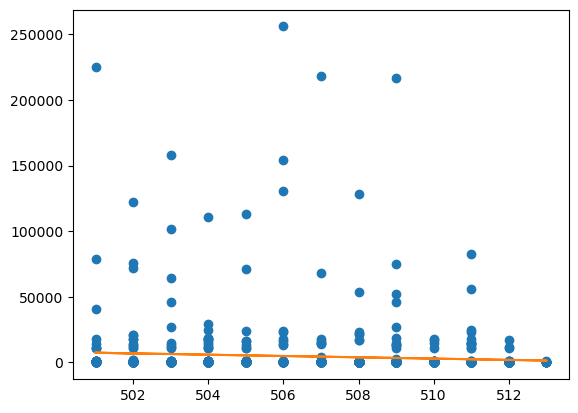

In [13]:
sql = "select * from CBASIC_DATA"
conn = cx_Oracle.connect(user='admin', password='Tongbrown@23', dsn='tongbrown_high')
cs = conn.cursor()
rs = cs.execute(sql)

row = cs.fetchall()
colname = cs.description
col = []

for i in colname:
    col.append(i[0])
    
emp = pd.DataFrame(row,columns = col)

x=emp[['DATA_COUNT']]
y=emp[['DATE_WRITE']]

x_list = x.values.tolist()
y_list = y.values.tolist()

xs = sum(x_list,[])
ys = sum(y_list,[])

xd = []
xf =[]
for i in xs:
    temp = i.replace("k","000")
    xd.append(temp)

for j in xd:
    t = j.replace(".","")
    xf.append(t)

xdata = list(map(int, xf))

yd = []

for k in ys:
    q = k.replace("-","")
    yd.append(q)

ydata = list(map(int,yd))
X = np.array(xdata)
Y = np.array(ydata)

Xx = X.reshape(-1,1)
Yy = Y.reshape(-1,1)

lr = LinearRegression()
lr.fit(Yy,Xx)

print(lr.coef_[0])

print(lr.intercept_)
[-496.51425784]
[256184.34058456]
plt.plot(Yy,Xx, 'o')
plt.plot(Yy, lr.predict(Yy))
plt.show()

In [14]:
title=np.array(emp['DATA_TITLE'])

okt = Okt()
kkma = Kkma()
komoran = Komoran()
hannanum = Hannanum()
def phr(A,i):
    return okt.phrases(A[i])
title_list = list(title)
sample_list = [v for v in title_list if v]
len(sample_list)
988
sample_array = np.array(sample_list)

In [15]:
word = []
for i in range(len(sample_array)):
    word = word + phr(sample_array,i)
word

['mr4',
 'mr4 화이트',
 'mr4 화이트 도착',
 '화이트',
 '도착',
 '에어컨',
 '이벤트',
 '새 배너',
 '배너',
 'MR4',
 '도착',
 '아사히슈퍼드라이',
 '아사히슈퍼드라이 생맥주',
 '아사히슈퍼드라이 생맥주 국내',
 '아사히슈퍼드라이 생맥주 국내와 해외버전',
 '아사히슈퍼드라이 생맥주 국내와 해외버전 차이점',
 '아사히',
 '슈퍼',
 '드라이',
 '생맥주',
 '국내',
 '해외',
 '버전',
 '차이점',
 '유투브',
 '유투브 광고',
 '유투브 광고 더',
 '그광고',
 '광고',
 '이정',
 '주차',
 '주차하면  x',
 '주차하면  x 먹으라는건가',
 '건가',
 '하하핫전달',
 '하하핫전달 만근',
 '하하핫전달 만근 하자마자',
 '하하핫전달 만근 하자마자 바로',
 '하하',
 '전달',
 '만근',
 '하자',
 '마자',
 '바로',
 '카드포인트',
 '카드포인트 통합조회',
 '카드포인트 통합조회 하시는분',
 '카드',
 '포인트',
 '통합',
 '조회',
 '블라인드',
 '블라인드 처리',
 '블라인드 처리된 글',
 '처리',
 '퀘존',
 '퀘존 장터',
 '사기',
 '스읍',
 '장터',
 '잠시후',
 '잠시후 20시',
 '잠시후 20시 퀘존특',
 '로그케이스',
 '로그케이스 류오쿨러',
 '로그케이스 류오쿨러 행사',
 '잠시',
 '20시',
 '퀘존특',
 '로그',
 '케이스',
 '오쿨러',
 '행사',
 '4070이',
 '4070이 안',
 '4070생산',
 '중단',
 '중단하는 건',
 '중단하는 건 바보',
 '중단하는 건 바보같은 생각',
 '4070',
 '생산',
 '바보',
 '생각',
 '11마존',
 '배송',
 '11',
 '마존',
 '지도교수님',
 '실습',
 '연락',
 '지도',
 '교수님',
 '안내견들',
 '횐님들',
 '횐님들 그거',
 '그거',
 '월1000만원',
 '월1000만원 직장인',
 

In [16]:
word_nouns = []
for i in range(len(sample_array)):
    word_nouns = word_nouns + okt.nouns(sample_array[i])
word_nouns

['저',
 '화이트',
 '도착',
 '에어컨',
 '특',
 '이벤트',
 '새',
 '배너',
 '도착',
 '아사히',
 '슈퍼',
 '드라이',
 '생맥주',
 '국내',
 '해외',
 '버전',
 '차이점',
 '유투브',
 '광고',
 '더',
 '광고',
 '이정',
 '주차',
 '건가',
 '하하',
 '핫',
 '전달',
 '하자',
 '마자',
 '바로',
 '카드',
 '포인트',
 '통합',
 '조회',
 '분',
 '블라인드',
 '처리',
 '글',
 '퀘존',
 '장터',
 '사기',
 '스읍',
 '잠시',
 '후',
 '퀘존특',
 '로그',
 '케이스',
 '류',
 '쿨러',
 '행사',
 '이',
 '생산',
 '중단',
 '건',
 '바보',
 '생각',
 '마존',
 '배송',
 '지도',
 '교수',
 '실습',
 '연락',
 '안내견',
 '횐님들',
 '그거',
 '월',
 '직장인',
 '월',
 '백수',
 '빅스',
 '마일',
 '데이',
 '때',
 '할인',
 '쪽지',
 '신고',
 '의자',
 '때문',
 '모니터',
 '문제',
 '수',
 '마켓',
 '팔이',
 '신고',
 '웨이',
 '코스',
 '토체프',
 '바',
 '밀로',
 '로지텍',
 '마우스',
 '충격',
 '먹음',
 '빅스',
 '마일',
 '데이',
 '때',
 '가격',
 '질',
 '취소',
 '경우',
 '저',
 '당첨',
 '기회',
 '인택앤',
 '컴퍼니',
 '인증',
 '이벤트',
 '당첨',
 '손톱',
 '생',
 '진짜',
 '보이스피싱',
 '전화',
 '대검찰청',
 '사칭',
 '전생',
 '나라',
 '구한',
 '개근',
 '제',
 '생활',
 '활력소',
 '웹툰',
 '마음',
 '이마트',
 '계열',
 '의',
 '도입',
 '퀘존',
 '가입',
 '한지',
 '달',
 '하드웨어',
 '직구',
 '프리',
 '거',
 '일',
 '삶',
 '질',
 '향상',
 '감동',
 